Crime and weather

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

First I will read in both datasets as pandas dataframes

In [3]:
crimeDF= pd.read_csv("crime.csv", encoding='windows-1254')
weatherDF = pd.read_csv("weather_data_long.csv")


In [4]:
crimeDF.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT
0,2017421909,2017421909299900,2999,0,criminal-mischief-other,public-disorder,6/25/2017 8:40:00 PM,NaN,6/27/2017 7:01:00 PM,2920 W 32ND AVE,3133773.0,1702660.0,-105.024167,39.761646,1,113,highland,1,0,1
1,2017342682,2017342682299900,2999,0,criminal-mischief-other,public-disorder,5/26/2017 7:00:00 PM,NaN,5/26/2017 11:04:00 PM,13400 E ALBROOK DR,3185904.0,1709037.0,-104.838576,39.778256,5,521,montbello,1,0,1
2,2017421829,2017421829299900,2999,0,criminal-mischief-other,public-disorder,6/27/2017 4:40:00 PM,NaN,6/27/2017 5:50:00 PM,1600 BLOCK 16TH ST,3140436.0,1699005.0,-105.000538,39.751514,6,612,union-station,1,0,1
3,2017342681,2017342681299900,2999,0,criminal-mischief-other,public-disorder,5/26/2017 7:01:00 PM,NaN,5/26/2017 10:21:00 PM,2200 BLOCK MARKET ST,3143338.0,1700561.0,-104.990186,39.755741,6,612,five-points,1,0,1
4,2017448789,2017448789299900,2999,0,criminal-mischief-other,public-disorder,7/7/2017 9:48:00 PM,NaN,7/7/2017 9:48:00 PM,1733 N GROVE ST,3132994.0,1696487.0,-105.027052,39.744711,1,121,west-colfax,1,0,1


https://towardsdatascience.com/analysis-of-nyc-reported-crime-data-using-pandas-821753cd7e22


In [5]:
weatherDF.head()

,Date,Time,Temperature,DewPoint,Humidity,Wind,WinSpeed,WindGust,Pressure,Precip.,Condition
0,2002-01-01,12:53 AM,19,13,77,ENE,14,0,24.73,0.0,Cloudy
1,2002-01-02,12:53 AM,10,-3,56,SE,5,0,24.94,0.0,Mostly Cloudy
2,2002-01-04,12:53 AM,30,14,51,W,9,0,24.45,0.0,Partly Cloudy
3,2002-01-05,12:53 AM,25,18,75,CALM,0,0,24.74,0.0,Mostly Cloudy
4,2002-01-06,12:53 AM,23,9,55,SSE,13,0,24.74,0.0,Mostly Cloudy


Now I will give some general data visualizations of both

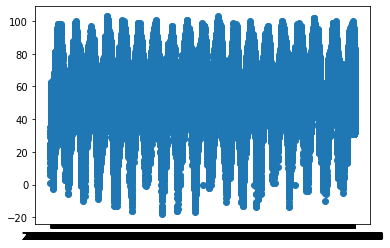

In [6]:
plt.scatter(weatherDF["Date"], weatherDF["Temperature"])
plt.show()


In [7]:
weatherDF.isna().sum()


Date             0
Time             0
Temperature      0
DewPoint         0
Humidity         0
Wind           197
WinSpeed         0
WindGust         0
Pressure         0
Precip.          0
Condition        4
dtype: int64

In [8]:
crimeDF.isna().sum()

incident_id                    0
offense_id                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      193431
REPORTED_DATE                  0
INCIDENT_ADDRESS            5538
GEO_X                       5538
GEO_Y                       5538
GEO_LON                     5538
GEO_LAT                     5538
DISTRICT_ID                 1458
PRECINCT_ID                    0
NEIGHBORHOOD_ID             5276
IS_CRIME                       0
IS_TRAFFIC                     0
VICTIM_COUNT                   0
dtype: int64

In [9]:
# df['Dates'] = pd.to_datetime(df['date']).dt.date
# df['Time'] = pd.to_datetime(df['date']).dt.time
#formatted the date and time into different columns for report date, occurrence date
crimeDF["REPORT_DATE"] = pd.to_datetime(crimeDF["REPORTED_DATE"]).dt.date
crimeDF["REPORT_TIME"] = pd.to_datetime(crimeDF["REPORTED_DATE"]).dt.time




In [10]:
crimeDF["OCCURRENCE_DATE"] = pd.to_datetime(crimeDF["FIRST_OCCURRENCE_DATE"]).dt.date
crimeDF["OCCURRENCE_TIME"] = pd.to_datetime(crimeDF["FIRST_OCCURRENCE_DATE"]).dt.time

In [11]:
crimeDF.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT,REPORT_DATE,REPORT_TIME,OCCURRENCE_DATE,OCCURRENCE_TIME
0,2017421909,2017421909299900,2999,0,criminal-mischief-other,public-disorder,6/25/2017 8:40:00 PM,NaN,6/27/2017 7:01:00 PM,2920 W 32ND AVE,...,1,113,highland,1,0,1,2017-06-27,19:01:00,2017-06-25,20:40:00
1,2017342682,2017342682299900,2999,0,criminal-mischief-other,public-disorder,5/26/2017 7:00:00 PM,NaN,5/26/2017 11:04:00 PM,13400 E ALBROOK DR,...,5,521,montbello,1,0,1,2017-05-26,23:04:00,2017-05-26,19:00:00
2,2017421829,2017421829299900,2999,0,criminal-mischief-other,public-disorder,6/27/2017 4:40:00 PM,NaN,6/27/2017 5:50:00 PM,1600 BLOCK 16TH ST,...,6,612,union-station,1,0,1,2017-06-27,17:50:00,2017-06-27,16:40:00
3,2017342681,2017342681299900,2999,0,criminal-mischief-other,public-disorder,5/26/2017 7:01:00 PM,NaN,5/26/2017 10:21:00 PM,2200 BLOCK MARKET ST,...,6,612,five-points,1,0,1,2017-05-26,22:21:00,2017-05-26,19:01:00
4,2017448789,2017448789299900,2999,0,criminal-mischief-other,public-disorder,7/7/2017 9:48:00 PM,NaN,7/7/2017 9:48:00 PM,1733 N GROVE ST,...,1,121,west-colfax,1,0,1,2017-07-07,21:48:00,2017-07-07,21:48:00


Now i am going to drop the columns that I do not need/ incomplete: incidentID,offenseID, offense code, offence code extention, first occurance date, last occurance date, reported date

In [12]:
del crimeDF["incident_id"]
del crimeDF["offense_id"]
del crimeDF["OFFENSE_CODE"]
del crimeDF["OFFENSE_CODE_EXTENSION"]
del crimeDF["FIRST_OCCURRENCE_DATE"]
del crimeDF["LAST_OCCURRENCE_DATE"]
del crimeDF["REPORTED_DATE"]
del crimeDF["VICTIM_COUNT"]

In [14]:
crimeDF.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORT_DATE,REPORT_TIME,OCCURRENCE_DATE,OCCURRENCE_TIME
0,criminal-mischief-other,public-disorder,2920 W 32ND AVE,3133773.0,1702660.0,-105.024167,39.761646,1,113,highland,1,0,2017-06-27,19:01:00,2017-06-25,20:40:00
1,criminal-mischief-other,public-disorder,13400 E ALBROOK DR,3185904.0,1709037.0,-104.838576,39.778256,5,521,montbello,1,0,2017-05-26,23:04:00,2017-05-26,19:00:00
2,criminal-mischief-other,public-disorder,1600 BLOCK 16TH ST,3140436.0,1699005.0,-105.000538,39.751514,6,612,union-station,1,0,2017-06-27,17:50:00,2017-06-27,16:40:00
3,criminal-mischief-other,public-disorder,2200 BLOCK MARKET ST,3143338.0,1700561.0,-104.990186,39.755741,6,612,five-points,1,0,2017-05-26,22:21:00,2017-05-26,19:01:00
4,criminal-mischief-other,public-disorder,1733 N GROVE ST,3132994.0,1696487.0,-105.027052,39.744711,1,121,west-colfax,1,0,2017-07-07,21:48:00,2017-07-07,21:48:00


In [56]:
del crimeDF["GEO_X"]
del crimeDF["GEO_Y"]
del crimeDF["GEO_LON"]
del crimeDF["GEO_LAT"]

In [57]:
crimeDF.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,INCIDENT_ADDRESS,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORT_DATE,REPORT_TIME,OCCURRENCE_DATE,OCCURRENCE_TIME
0,criminal-mischief-other,public-disorder,2920 W 32ND AVE,1,113,highland,1,0,2017-06-27,19:01:00,2017-06-25,20:40:00
1,criminal-mischief-other,public-disorder,13400 E ALBROOK DR,5,521,montbello,1,0,2017-05-26,23:04:00,2017-05-26,19:00:00
2,criminal-mischief-other,public-disorder,1600 BLOCK 16TH ST,6,612,union-station,1,0,2017-06-27,17:50:00,2017-06-27,16:40:00
3,criminal-mischief-other,public-disorder,2200 BLOCK MARKET ST,6,612,five-points,1,0,2017-05-26,22:21:00,2017-05-26,19:01:00
4,criminal-mischief-other,public-disorder,1733 N GROVE ST,1,121,west-colfax,1,0,2017-07-07,21:48:00,2017-07-07,21:48:00


Count the amount of occurrences in the columns

theft-of-motor-vehicle       48016
theft-items-from-vehicle     37804
theft-other                  23157
criminal-mischief-mtr-veh    22113
theft-parts-from-vehicle     21258
                             ...  
explosives-posses                1
bigamy                           1
drug-barbiturate-mfr             1
theft-of-cable-services          1
gambling-betting-wagering        1
Name: OFFENSE_TYPE_ID, Length: 195, dtype: int64


Text(0, 0.5, 'Number of Occurrences')

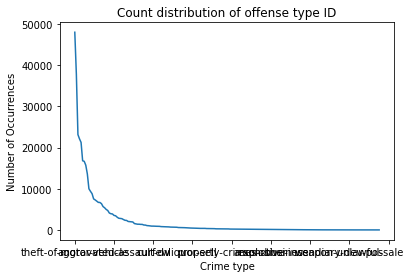

In [38]:
# print(crimeDF["OFFENSE_TYPE_ID"].value_counts())
offenseType =(crimeDF["OFFENSE_TYPE_ID"].value_counts())
print(offenseType)
crimeDF.shape
ax = offenseType.plot(title="Count distribution of offense type ID")
ax.set_xlabel("Crime type")
ax.set_ylabel("Number of Occurrences")


# print(crimeDF["OFFENSE_CATEGORY_ID"].value_counts())
# print(crimeDF["DISTRICT_ID"].value_counts())
# print(crimeDF["PRECINCT_ID"].value_counts())
# print(crimeDF["NEIGHBORHOOD_ID"].value_counts())
# print(crimeDF["IS_CRIME"].value_counts())
# print(crimeDF["IS_TRAFFIC"].value_counts())

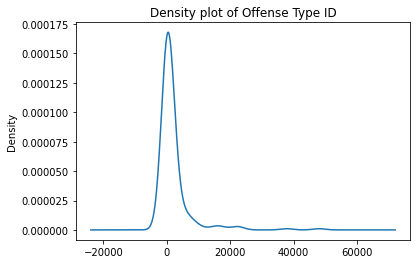

In [39]:
ax2 =offenseType.plot.kde(title="Density plot of Offense Type ID")


O do not like how many occurrences of types that occurred once

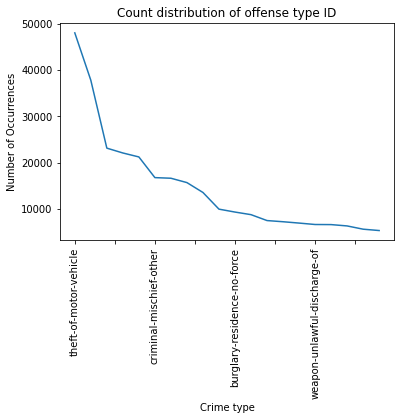

In [62]:
res = crimeDF[~crimeDF['OFFENSE_TYPE_ID'].isin(offenseType[offenseType < 5000].index)]

# print(res)
ax = (res["OFFENSE_TYPE_ID"].value_counts()).plot(title="Count distribution of offense type ID")
ax.set_xlabel("Crime type")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=90)
plt.show()

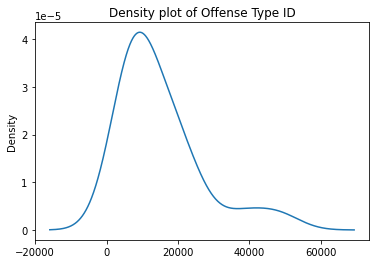

In [50]:
ax2 =(res["OFFENSE_TYPE_ID"].value_counts()).plot.kde(title="Density plot of Offense Type ID")

group by type: within type
offense category id

In [55]:
offenseCategory =(crimeDF["OFFENSE_CATEGORY_ID"].value_counts())
print("Offense Types in Denver and Occurrence count")
print(offenseCategory)

Offense Types in Denver and Occurrence count
theft-from-motor-vehicle        59062
public-disorder                 58994
all-other-crimes                56996
larceny                         56282
auto-theft                      49040
burglary                        27482
other-crimes-against-persons    26470
drug-alcohol                    25619
aggravated-assault              17163
robbery                          7184
white-collar-crime               7061
sexual-assault                   4956
arson                             863
murder                            417
Name: OFFENSE_CATEGORY_ID, dtype: int64


<AxesSubplot:ylabel='Density'>

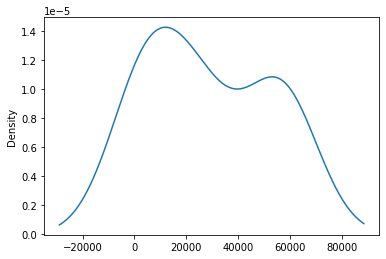

In [53]:
offenseCategory.plot.kde()

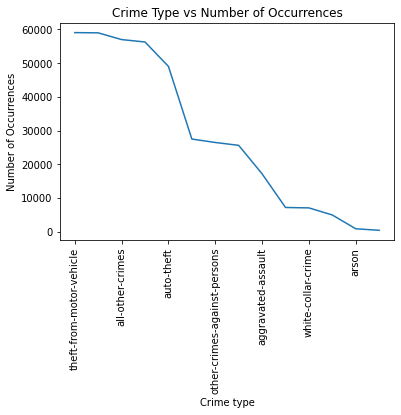

In [65]:
ax = offenseCategory.plot(title="Crime Type vs Number of Occurrences")
plt.xticks(rotation=90)
ax.set_xlabel("Crime type")
ax.set_ylabel("Number of Occurrences")

plt.show()

do we need support confidences/support
what are the things that we all need to have/want to have
Share/create the slides

In [70]:
crimeDF["Report Month"] = pd.DatetimeIndex(crimeDF["REPORT_DATE"]).month
crimeDF["Report Year"] = pd.DatetimeIndex(crimeDF["REPORT_DATE"]).year

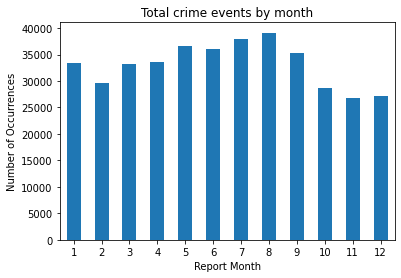

In [81]:

ax = crimeDF.groupby("Report Month").size().plot(kind = "bar", title= "Total crime events by month")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

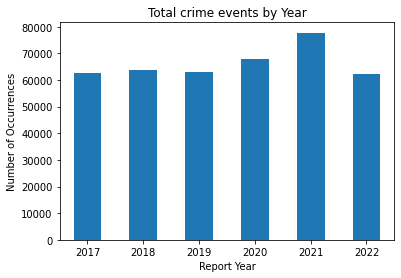

In [82]:
ax = crimeDF.groupby("Report Year").size().plot(kind = "bar", title= "Total crime events by Year")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()